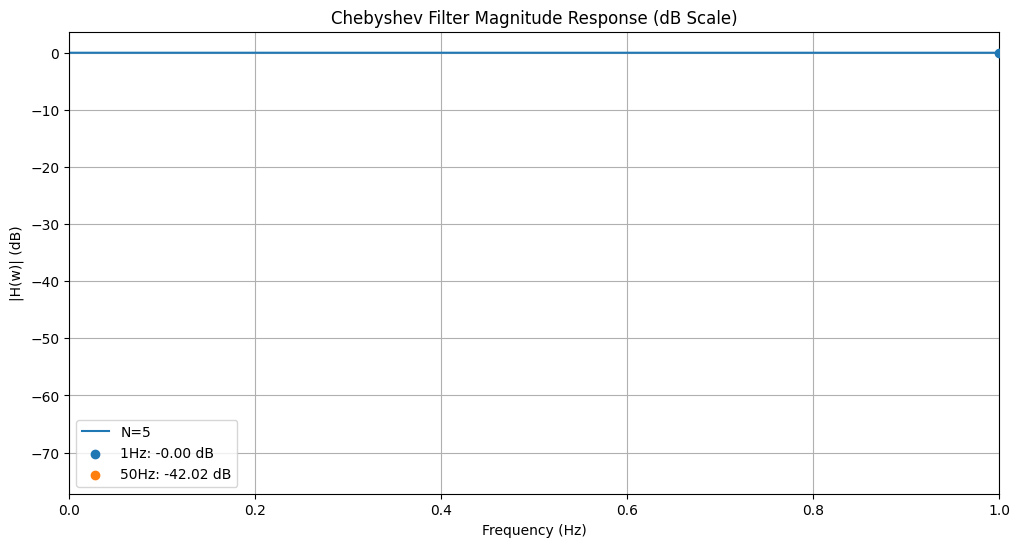

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 종류의 체비셰프 다항식을 정의하는 함수
def chebyshev_poly_first_kind(n, x):
    if n == 0:
        return np.ones_like(x)  # n이 0일 때, 모든 요소가 1인 배열을 반환
    elif n == 1:
        return x  # n이 1일 때, 입력 배열 x를 그대로 반환
    else:
        Tn_minus_one = x  # Tn-1 초기값 설정
        Tn_minus_two = np.ones_like(x)  # Tn-2 초기값 설정
        for i in range(2, n + 1):
            Tn = 2 * x * Tn_minus_one - Tn_minus_two  # 체비셰프 다항식 재귀 공식
            Tn_minus_two = Tn_minus_one  # 다음 반복을 위해 Tn-2 갱신
            Tn_minus_one = Tn  # 다음 반복을 위해 Tn-1 갱신
        return Tn

# 체비셰프 필터의 크기 응답
def chebyshev_magnitude_response(order, epsilon, w, wc):
    Tn = chebyshev_poly_first_kind(order, w / wc)  # 체비셰프 다항식을 계산
    magnitude = 1 / np.sqrt(1 + epsilon**2 * Tn**2)  # 크기 응답 계산
    return magnitude

# 리플 팩터 델타
def ripple_factor(epsilon):
    return 1 / (1 + epsilon**2)  # 리플 팩터 계산

# 주파수 범위 생성
w = np.linspace(0, 100, 400)  # 0에서 100까지 400개의 점을 생성
wc = 20  # 컷오프 주파수 설정 (20Hz)

# 필터 파라미터
order = 5  # 필터 차수
epsilon = 0.1  # 필터의 입실론 값 (예시로 0.5를 사용)

# 크기 응답 그리기
plt.figure(figsize=(12, 6))

# 전체 주파수 범위에 대한 크기 응답
magnitude_response = chebyshev_magnitude_response(order, epsilon, w, wc)
plt.plot(w, 20 * np.log10(magnitude_response), label=f'N={order}')  # dB 스케일로 변환

# 1Hz와 50Hz에 대한 크기 응답 계산 및 표시
frequencies = [1, 50]
for f in frequencies:
    response = 20 * np.log10(chebyshev_magnitude_response(order, epsilon, f, wc))
    plt.scatter(f, response, label=f'{f}Hz: {response:.2f} dB', zorder=5)

# 플롯 설정
plt.title('Chebyshev Filter Magnitude Response (dB Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H(w)| (dB)')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)  # x축의 범위를 0부터 100까지로 설정
plt.ylim() 

plt.show()

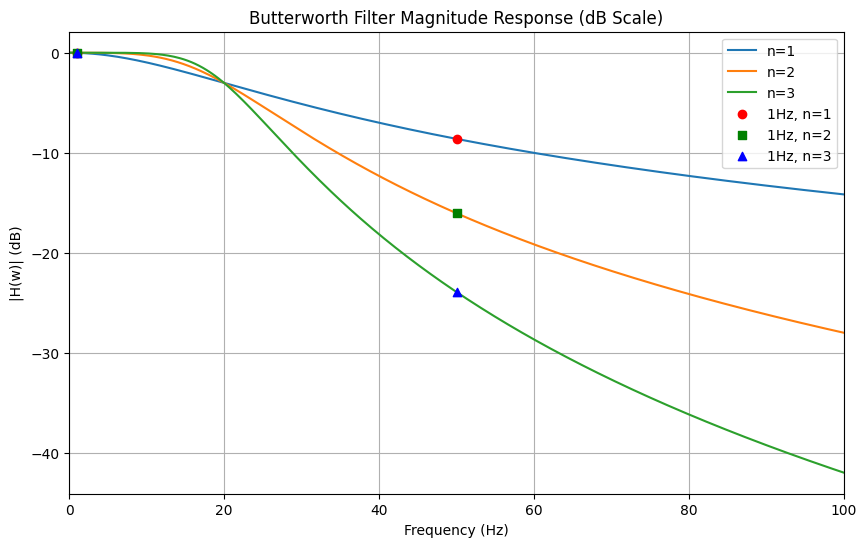

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 버터워스 필터의 크기 응답 함수를 정의
def butterworth_magnitude_response(order, wc, w):
    magnitude = 1 / np.sqrt(1 + (w / wc)**(2 * order))
    return magnitude

# 주파수 범위 생성
w = np.linspace(0, 100, 400)  # 0에서 100까지 400개의 점을 생성
wc = 20  # 컷오프 주파수 설정 (20Hz)

# 필터 차수 설정
orders = [1, 2, 3]  # 다양한 차수 예시

# 크기 응답을 그리기 위한 설정
plt.figure(figsize=(10, 6))

for order in orders:
    magnitude_response = butterworth_magnitude_response(order, wc, w)
    plt.plot(w, 20 * np.log10(magnitude_response), label=f'n={order}')  # dB 스케일로 변환

# 1Hz와 50Hz에 대한 크기 응답 계산 및 표시
frequencies = [1, 50]
colors = ['r', 'g', 'b']  # 각 차수별 색상
markers = ['o', 's', '^']  # 각 차수별 마커

for j, order in enumerate(orders):
    for i, f in enumerate(frequencies):
        response = 20 * np.log10(butterworth_magnitude_response(order, wc, f))
        plt.scatter(f, response, color=colors[j], marker=markers[j], label=f'{f}Hz, 
                    n={order}' if i == 0 else "", zorder=5)

# 플롯 설정
plt.title('Butterworth Filter Magnitude Response (dB Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H(w)| (dB)')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)  # x축의 범위를 0부터 100까지로 설정
plt.ylim()

plt.show()

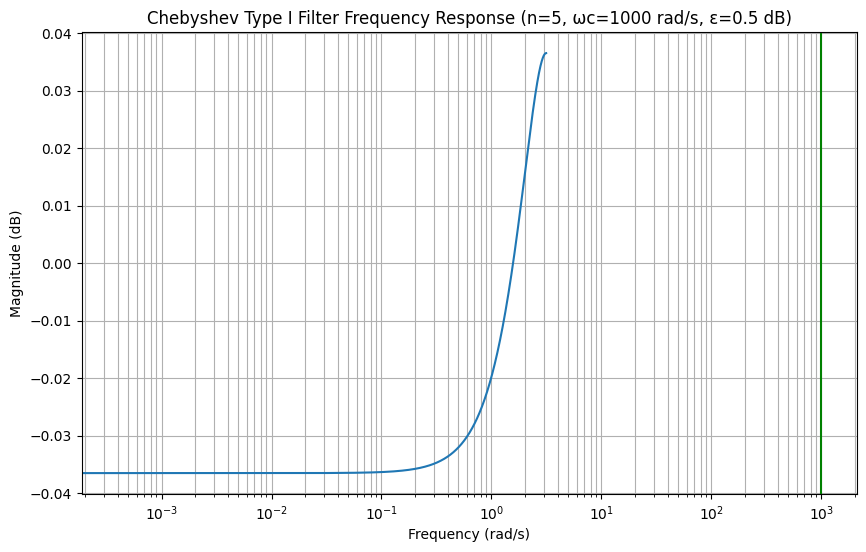

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, freqz

def plot_chebyshev_filter_response(order, ripple, cutoff_freq):
    # 체비셰프 타입 I 필터 설계
    b, a = cheby1(order, ripple, cutoff_freq, 'low', analog=True)
    
    # 주파수 응답 계산
    w, h = freqz(b, a, worN=8000, fs=2*np.pi)
    
    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(w, 20 * np.log10(np.abs(h)))
    plt.xscale('log')
    plt.title(f'Chebyshev Type I Filter Frequency Response (n={order}, ωc={cutoff_freq} rad/s, ε={ripple} dB)')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')
    plt.axvline(cutoff_freq, color='green')  # 차단 주파수 라인
    plt.show()

# 사용자 입력 받기
order = int(input("필터 차수를 입력하세요: "))
ripple = float(input("입실론(리플 크기)을 입력하세요 (dB): "))
cutoff_freq = 1000  # 차단 주파수 고정 (rad/s)

plot_chebyshev_filter_response(order, ripple, cutoff_freq)
